Cluster and GT comparison

GMM and GT comparison

In [57]:
import pandas as pd
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [58]:
pca_result =pd.read_csv('pca_dataframe.csv', low_memory=False).to_numpy()
df = pd.DataFrame(pca_result[:,:2])
y = pd.read_csv('ddos_dataset.csv', low_memory=False)['label'].to_numpy()
df['label'] = y.reshape(-1)

In [ ]:
agglo = AgglomerativeClustering(n_clusters=12, linkage='ward')
labels = agglo.fit_predict(pca_result)

In [ ]:
feature_importances = []
for i in range(len(pca_result.columns)):
    feature_importance = 0
    for pair in pairwise_distances(data):
        if pair[0] < pair[1]:
            feature_importance += np.abs(pair[0][i] - pair[1][i])
        else:
            feature_importance += np.abs(pair[1][i] - pair[0][i])
    feature_importances.append(feature_importance / len(pca_result))


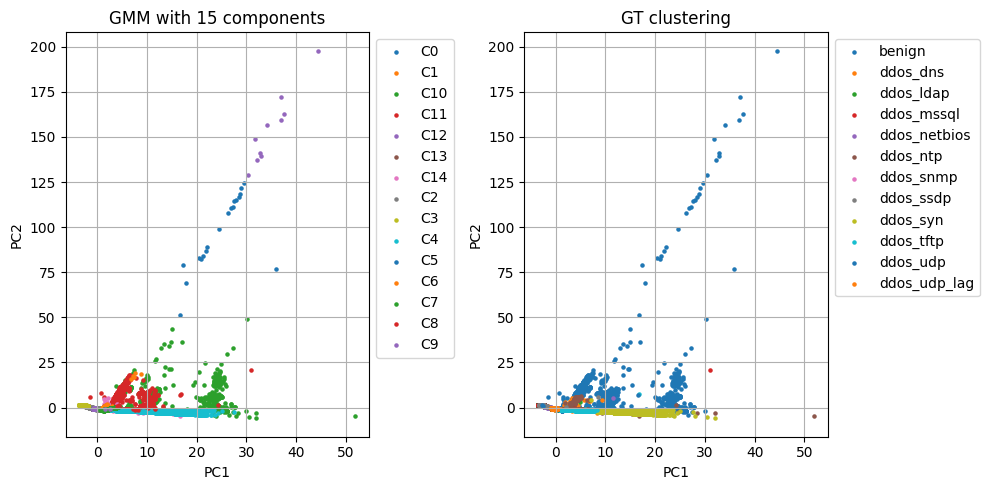

In [3]:
gmm = GaussianMixture(n_components=15)
labels = gmm.fit_predict(pca_result)
df['cid_gmm'] = [f'C{x}' for x in labels]

fig, ax = plt.subplots(1, 2, figsize=(10,5))

for i in np.unique(df.cid_gmm):
    subdf = df[df.cid_gmm == i]
    ax[0].scatter(subdf[0], subdf[1], label=i, s=5)
lgnd = ax[0].legend(bbox_to_anchor=(1, 1), loc="upper left")
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[0].set_title(f'GMM with 15 components')
ax[0].grid()

for i in np.unique(df.label):
    subdf = df[df.label == i]
    ax[1].scatter(subdf[0], subdf[1], label=i, s=5)

lgnd = ax[1].legend(bbox_to_anchor=(1, 1), loc="upper left")
ax[1].set_xlabel('PC1')
ax[1].set_ylabel('PC2')
ax[1].set_title('GT clustering')
ax[1].grid()
plt.tight_layout()
plt.show()

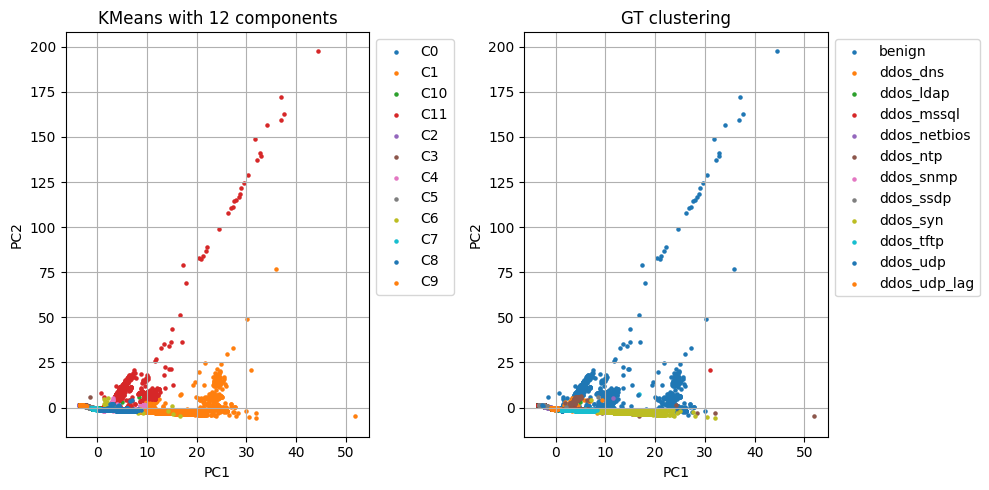

In [65]:
kmeans = KMeans(n_clusters=12, init='random', random_state=None, n_init=1)
labels = kmeans.fit_predict(pca_result)
df['cid_kmeans'] = [f'C{x}' for x in labels]

fig, ax = plt.subplots(1, 2, figsize=(10,5))

for i in np.unique(df.cid_kmeans):
    subdf = df[df.cid_kmeans == i]
    ax[0].scatter(subdf[0], subdf[1], label=i, s=5)
lgnd = ax[0].legend(bbox_to_anchor=(1, 1), loc="upper left")
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[0].set_title(f'KMeans with 12 components')
ax[0].grid()

for i in np.unique(df.label):
    subdf = df[df.label == i]
    ax[1].scatter(subdf[0], subdf[1], label=i, s=5)

lgnd = ax[1].legend(bbox_to_anchor=(1, 1), loc="upper left")
ax[1].set_xlabel('PC1')
ax[1].set_ylabel('PC2')
ax[1].set_title('GT clustering')
ax[1].grid()
plt.tight_layout()
plt.show()

<Axes: xlabel='c1', ylabel='c2'>

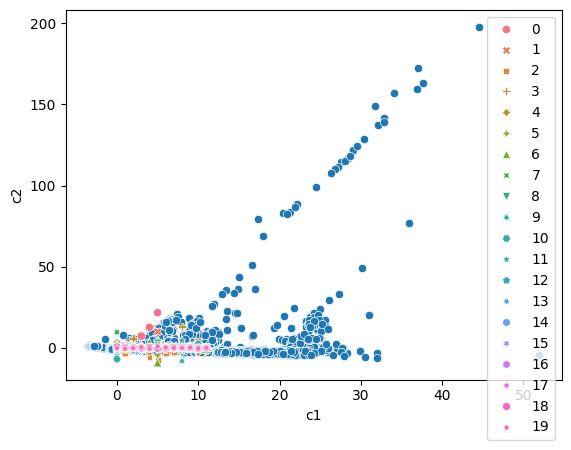

In [51]:
operational_df = pd.read_csv('pca_dataframe.csv', low_memory=False)
features = operational_df.columns

centroids = kmeans.cluster_centers_

sns.scatterplot(data=operational_df, x='c1', y='c2')
sns.scatterplot(centroids)

In [92]:
sorted_centroid_features_idx = centroids.argsort(axis=1)[:, ::-1]
print(f'Sorted Feature/Dimension Indexes for Each Centroid in Descending Order: \n{sorted_centroid_features_idx}')
sorted_centroid_features_values = abs(np.take_along_axis(centroids, sorted_centroid_features_idx, axis=1))
print(f"Sorted Feature/Dimension Values for Each Centroid in Descending Order: \n{sorted_centroid_features_values}")

Sorted Feature/Dimension Indexes for Each Centroid in Descending Order: 
[[ 7  2  4  6  0 15 14 18 17 16 19  9  1 12 13  3  8 11  5 10]
 [ 1 13 14  4  6 15 11 12 18  7 16 17 10  8  5  9 19  3  2  0]
 [ 3  9  2 13 12  8 14 15 17 18 16  6  7 19  5 10  0  4  1 11]
 [ 0  4  5  6 19 12 10 15 14 16 18  3 17  9 13  1  2 11  7  8]
 [ 0  6  5 15 14 18 11  8 17 13 16  3 12  9 19 10  7  4  1  2]
 [ 0  1  4  8  7 10 19  3 13  9 17 16 11 18 14 12 15  5  2  6]
 [ 1 13 12 19  4 17 14  7  6 10 11 16  8 15 18  5  9  3  2  0]
 [ 1  6  4  9 15 18 12 11  3  8 17 16 10 19 14  7  5 13  2  0]
 [ 3 11  7  2 10 18 16 15 17 19  6 14  0  1 13  5 12  4  8  9]
 [ 2  9  0 11 19 18 15  8 16 17  4 10  3  5  6 14  1  7 12 13]
 [ 2 12  0  4  6 10  8  1 11 13 16 17 14 18 19 15  3  9  7  5]
 [ 2  5  7 13 10 19 14 16 17 12 11  8 18 15  0  9  4  1  6  3]]
Sorted Feature/Dimension Values for Each Centroid in Descending Order: 
[[9.66277119e+00 3.95801762e+00 3.61502817e+00 2.99160579e+00
  2.41959606e+00 1.62916423e+00 6.80

In [93]:
for n in range(12):
    first_features_in_centroid_n = centroids[n][sorted_centroid_features_idx[n]]
    print(list(zip([features[feature] for feature in sorted_centroid_features_idx[n]], first_features_in_centroid_n)))


[('c8', 9.662771191389165), ('c3', 3.958017620382472), ('c5', 3.6150281709534466), ('c7', 2.9916057871683686), ('c1', 2.4195960593562384), ('c16', 1.62916423092134), ('c15', 0.680628688892296), ('c19', 0.6330947796911748), ('c18', 0.4790559210543802), ('c17', -0.04136442666739884), ('c20', -0.2628159272120512), ('c10', -0.7648329836485032), ('c2', -1.0747687680960516), ('c13', -1.1134187901733423), ('c14', -1.6053957074502576), ('c4', -2.1045666281063276), ('c9', -2.2820154152532686), ('c12', -3.0439348950661107), ('c6', -6.86582426068797), ('c11', -6.92490260218636)]
[('c2', 1.434721855735385), ('c14', 0.9188156438429047), ('c15', 0.48151753862939567), ('c5', 0.40742487135156513), ('c7', 0.18329373957815467), ('c16', 0.16887523751011257), ('c12', 0.14273800356955224), ('c13', 0.10723238765420279), ('c19', 0.051770546579648934), ('c8', 0.041057733284750646), ('c17', -0.0021585398047301424), ('c18', -0.04403868115447856), ('c11', -0.1149421246260878), ('c9', -0.18112570954492044), ('c6'

In [ ]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture

# Load the data
data = ...  # Load your data

# Calculate feature importance for K-Means
kmeans = KMeans()
kmeans.fit(data)

feature_importances = []
for i in range(len(data.columns)):
    feature_importance = 0
    for point in data:
        distance_to_centroid = kmeans.transform([point])[0]
        feature_importance += abs(distance_to_centroid[i])
    feature_importances.append(feature_importance / len(data))


# Calculate feature importance for DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=5)
dbscan.fit(data)

feature_importances = []
for i in range(len(data.columns)):
    feature_importance = 0
    for point in data:
        if dbscan.labels_[i] != dbscan.labels_[0]:
            feature_importance += abs(point[i])
    feature_importances.append(feature_importance / len(data))

# Calculate feature importance for Gaussian Mixture Model
gmm = GaussianMixture()
gmm.fit(data)

feature_importances = []
for i in range(len(data.columns)):
    means = gmm.means_
    variances = gmm.covariances_
    feature_importance = 0
    for mean in means:
        feature_importance += np.sqrt(np.sum(mean * mean))
    for variance in variances:
        feature_importance += np.sqrt(np.sum(variance))
    feature_importances.append(feature_importance / len(data))


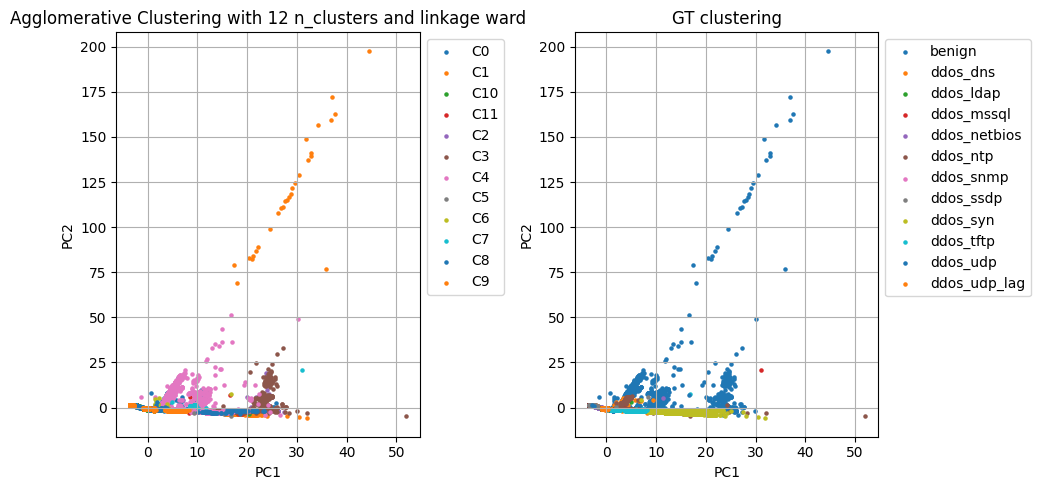

In [5]:
batch_size = 10000
aggC = AgglomerativeClustering(n_clusters=12, linkage='ward')
labels = []

for i in range(0, pca_result.shape[0], batch_size):
    batch = pca_result[i:i+batch_size, :]
    labels.append(aggC.fit_predict(batch))
labels = np.concatenate(labels)

df['cid_aggC'] = [f'C{x}' for x in labels]
df['label'] = y.reshape(-1)

fig, ax = plt.subplots(1, 2, figsize=(10,5))

for i in np.unique(df.cid_aggC):
    subdf = df[df.cid_aggC == i]
    ax[0].scatter(subdf[0], subdf[1], label=i, s=5)
lgnd = ax[0].legend(bbox_to_anchor=(1, 1), loc="upper left")
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[0].set_title(f'Agglomerative Clustering with 12 n_clusters and linkage ward')
ax[0].grid()

for i in np.unique(df.label):
    subdf = df[df.label == i]
    ax[1].scatter(subdf[0], subdf[1], label=i, s=5)

lgnd = ax[1].legend(bbox_to_anchor=(1, 1), loc="upper left")
ax[1].set_xlabel('PC1')
ax[1].set_ylabel('PC2')
ax[1].set_title('GT clustering')
ax[1].grid()
plt.tight_layout()
plt.show()

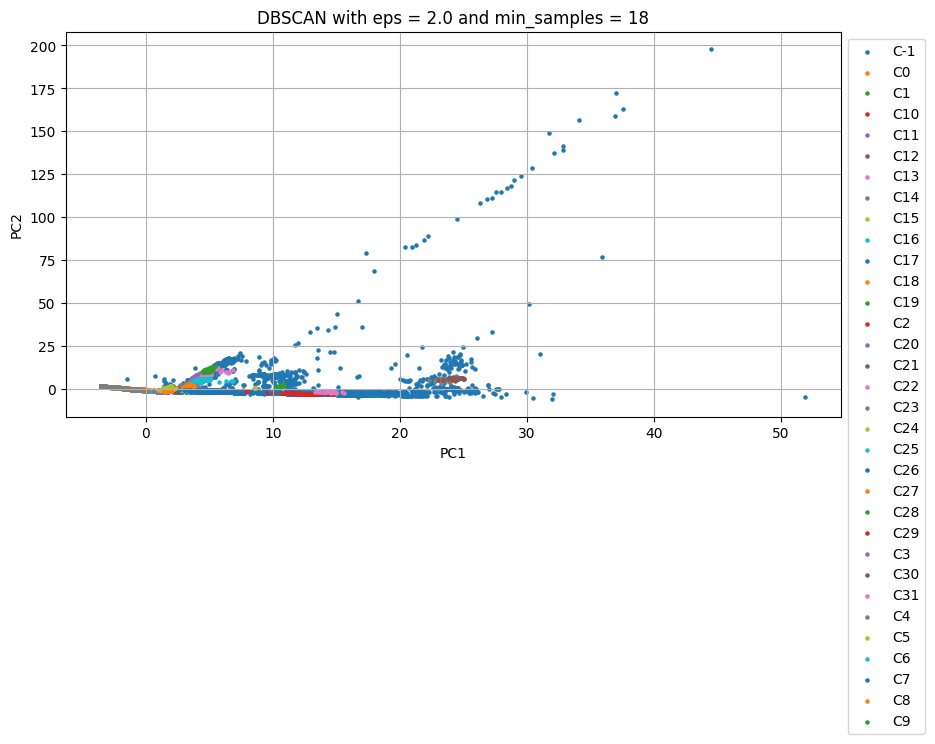

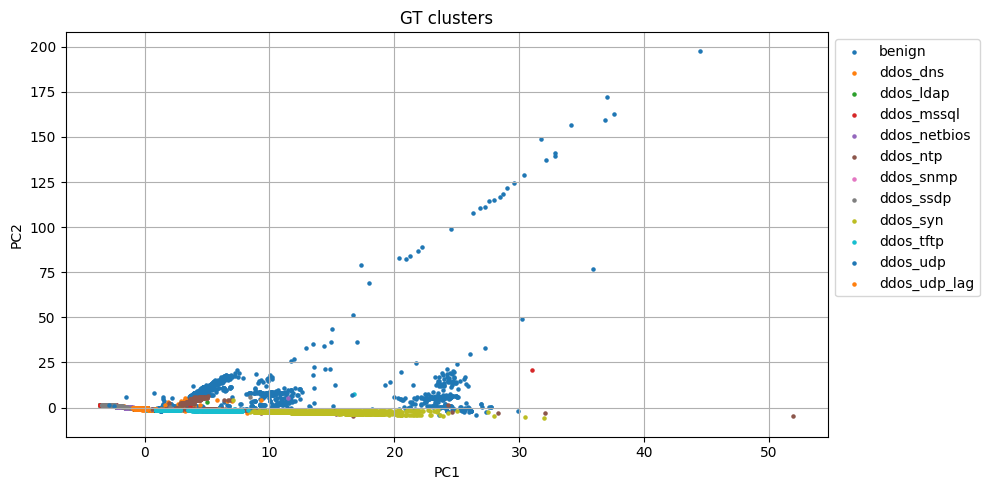

In [6]:
best_eps = 2.0
best_min = 18
dbscan = DBSCAN(eps=best_eps, min_samples=best_min)
labels = dbscan.fit_predict(pca_result)
df['cid_dbscan'] = [f'C{x}' for x in labels]
fig, ax = plt.subplots(figsize=(10,5))

for i in np.unique(df.cid_dbscan):
    subdf = df[df.cid_dbscan == i]
    ax.scatter(subdf[0], subdf[1], label=i, s=5)
ax.grid()
lgnd = ax.legend(bbox_to_anchor=(1, 1), loc="upper left")
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title(f'DBSCAN with eps = {best_eps} and min_samples = {best_min}')

fig, ax = plt.subplots(figsize=(10, 5))
for i in np.unique(df.label):
    subdf = df[df.label == i]
    ax.scatter(subdf[0], subdf[1], label=i, s=5)
ax.grid()
lgnd = plt.legend(bbox_to_anchor=(1, 1), loc="upper left")
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('GT clusters')

plt.tight_layout()
plt.show()

In [7]:
df[2] = pca_result[:, 2]
df

,0,1,label,cid_gmm,cid_kmeans,cid_aggC,cid_dbscan,2
0,-0.478653,-0.589533,ddos_dns,C0,C8,C4,C0,0.998409
1,-0.464128,-0.267606,ddos_dns,C2,C7,C10,C0,0.902600
2,-0.523195,-0.620103,ddos_dns,C0,C9,C4,C0,1.268103
3,-0.459103,-0.568340,ddos_dns,C0,C9,C4,C0,1.348160
4,-0.490045,-0.592144,ddos_dns,C0,C9,C4,C0,1.310972
...,...,...,...,...,...,...,...,...
64234,-0.753011,-0.575134,ddos_udp_lag,C2,C1,C7,C0,0.697743
64235,0.190764,-0.564125,ddos_udp_lag,C2,C8,C8,C0,1.542294
64236,-0.722891,-0.590632,ddos_udp_lag,C2,C1,C7,C0,0.743384
64237,0.191507,-0.546475,ddos_udp_lag,C2,C8,C0,C0,1.541808


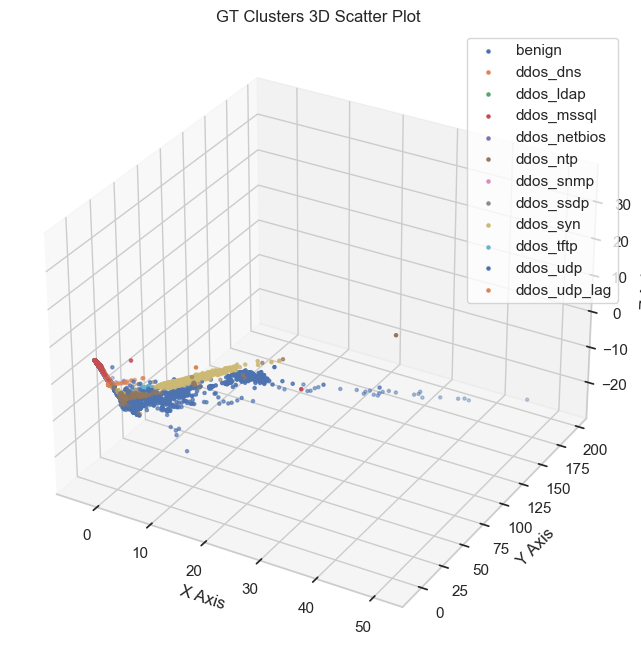

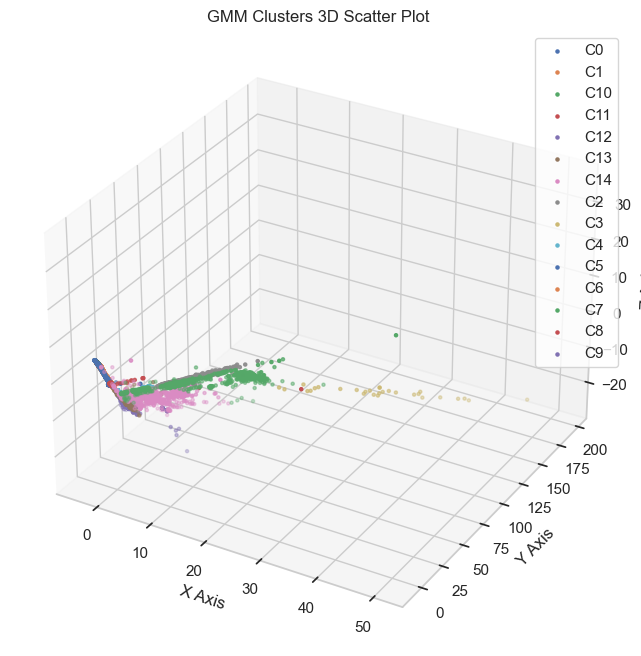

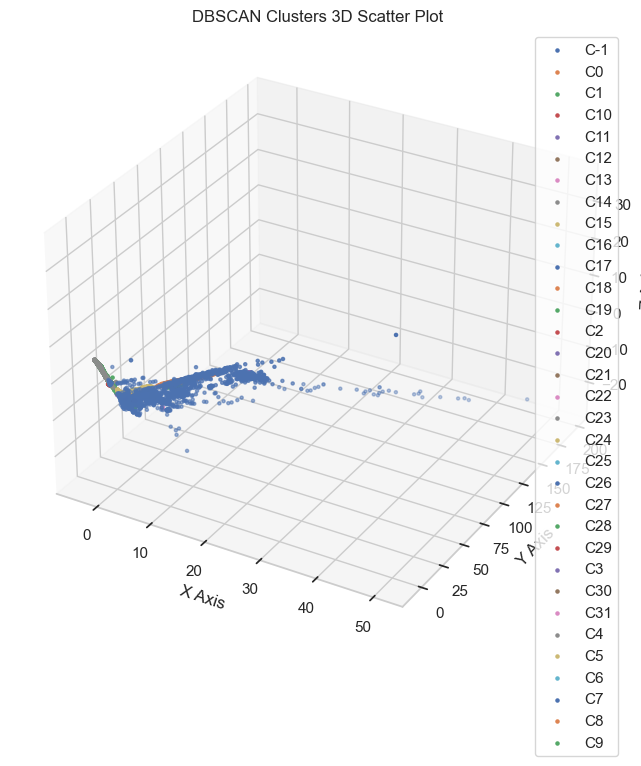

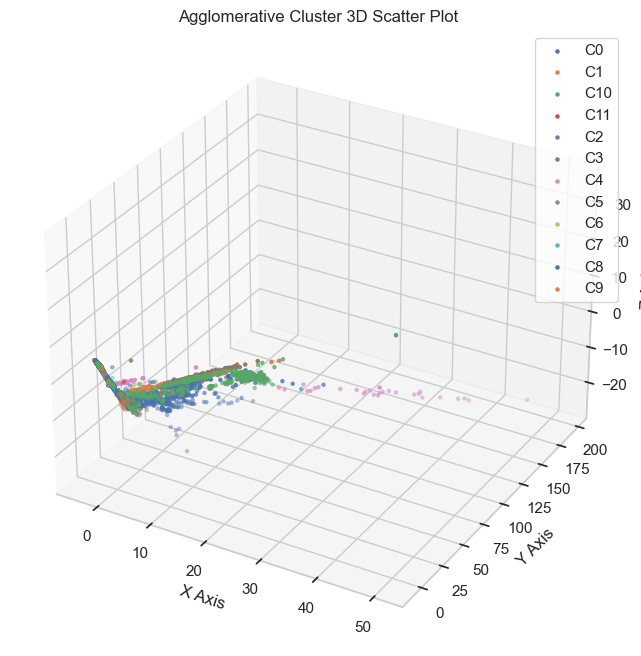

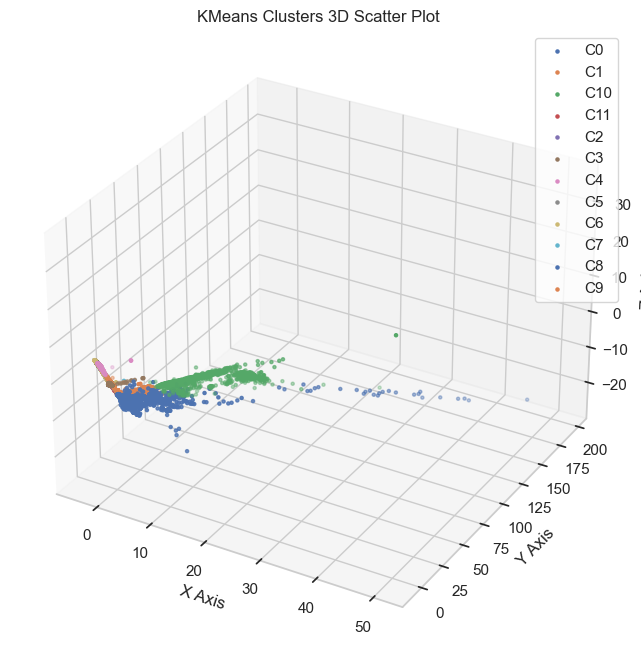

In [8]:
sns.set(style="whitegrid")
# Create a 3D scatter plot with color-coded clusters using Seaborn
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
for i in np.unique(df.label):
    subdf = df[df.label == i]
    ax.scatter(subdf[0], subdf[1], subdf[2], label=i, s=5)

# Customize the plot
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')
ax.set_title('GT Clusters 3D Scatter Plot')
ax.legend()

# Show the plot
plt.show()

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
for i in np.unique(df.cid_gmm):
    subdf = df[df.cid_gmm == i]
    ax.scatter(subdf[0], subdf[1], subdf[2], label=i, s=5)

# Customize the plot
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')
ax.set_title('GMM Clusters 3D Scatter Plot')
ax.legend()

# Show the plot
plt.show()

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
for i in np.unique(df.cid_dbscan):
    subdf = df[df.cid_dbscan == i]
    ax.scatter(subdf[0], subdf[1], subdf[2], label=i, s=5)

# Customize the plot
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')
ax.set_title('DBSCAN Clusters 3D Scatter Plot')
ax.legend()

# Show the plot
plt.show()

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
for i in np.unique(df.cid_aggC):
    subdf = df[df.cid_aggC == i]
    ax.scatter(subdf[0], subdf[1], subdf[2], label=i, s=5)

# Customize the plot
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')
ax.set_title('Agglomerative Cluster 3D Scatter Plot')
ax.legend()

# Show the plot
plt.show()

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
for i in np.unique(df.cid_kmeans):
    subdf = df[df.cid_kmeans == i]
    ax.scatter(subdf[0], subdf[1], subdf[2], label=i, s=5)

# Customize the plot
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')
ax.set_title('KMeans Clusters 3D Scatter Plot')
ax.legend()

# Show the plot
plt.show()

In [9]:
df

,0,1,label,cid_gmm,cid_kmeans,cid_aggC,cid_dbscan,2
0,-0.478653,-0.589533,ddos_dns,C0,C8,C4,C0,0.998409
1,-0.464128,-0.267606,ddos_dns,C2,C7,C10,C0,0.902600
2,-0.523195,-0.620103,ddos_dns,C0,C9,C4,C0,1.268103
3,-0.459103,-0.568340,ddos_dns,C0,C9,C4,C0,1.348160
4,-0.490045,-0.592144,ddos_dns,C0,C9,C4,C0,1.310972
...,...,...,...,...,...,...,...,...
64234,-0.753011,-0.575134,ddos_udp_lag,C2,C1,C7,C0,0.697743
64235,0.190764,-0.564125,ddos_udp_lag,C2,C8,C8,C0,1.542294
64236,-0.722891,-0.590632,ddos_udp_lag,C2,C1,C7,C0,0.743384
64237,0.191507,-0.546475,ddos_udp_lag,C2,C8,C0,C0,1.541808


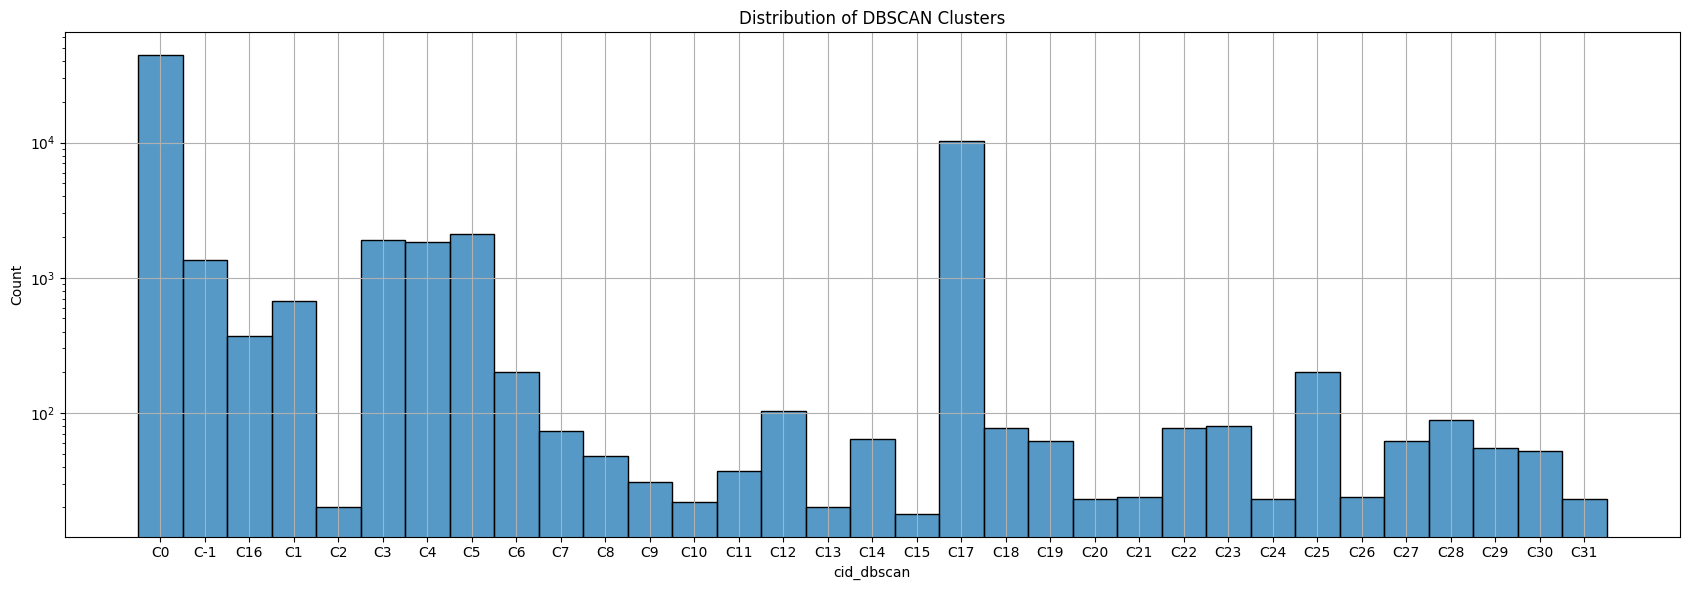

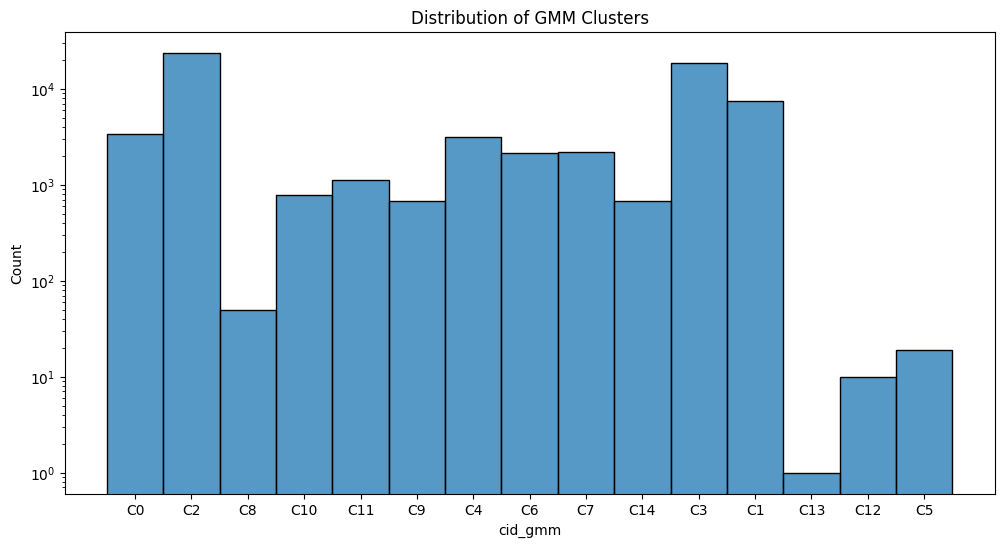

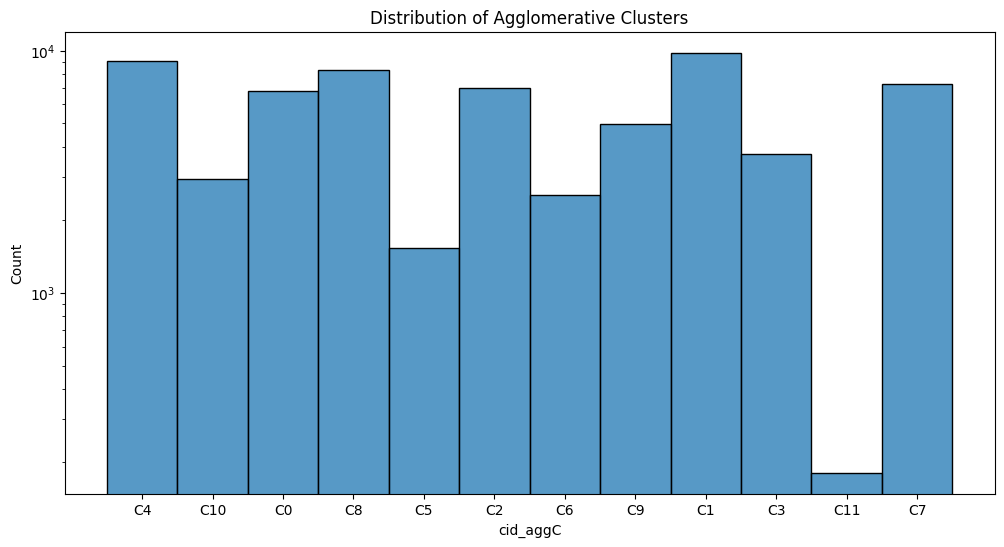

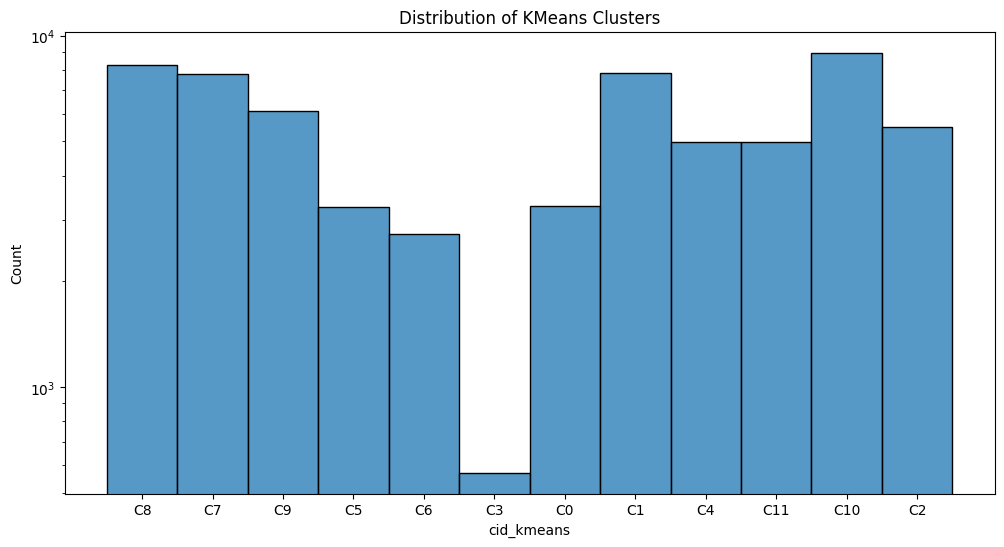

In [11]:
cluster_df = df

plt.figure(figsize=(17, 6))
sns.histplot(x='cid_dbscan', data=cluster_df)
plt.title('Distribution of DBSCAN Clusters')
plt.yscale('log')
plt.grid(True)
plt.tight_layout()
plt.show()

# Visualize the distribution of GMM clusters
plt.figure(figsize=(12, 6))
sns.histplot(x='cid_gmm', data=cluster_df)
plt.yscale('log')
plt.title('Distribution of GMM Clusters')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(x='cid_aggC', data=cluster_df)
plt.yscale('log')
plt.title('Distribution of Agglomerative Clusters')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(x='cid_kmeans', data=cluster_df)
plt.yscale('log')
plt.title('Distribution of KMeans Clusters')
plt.show()

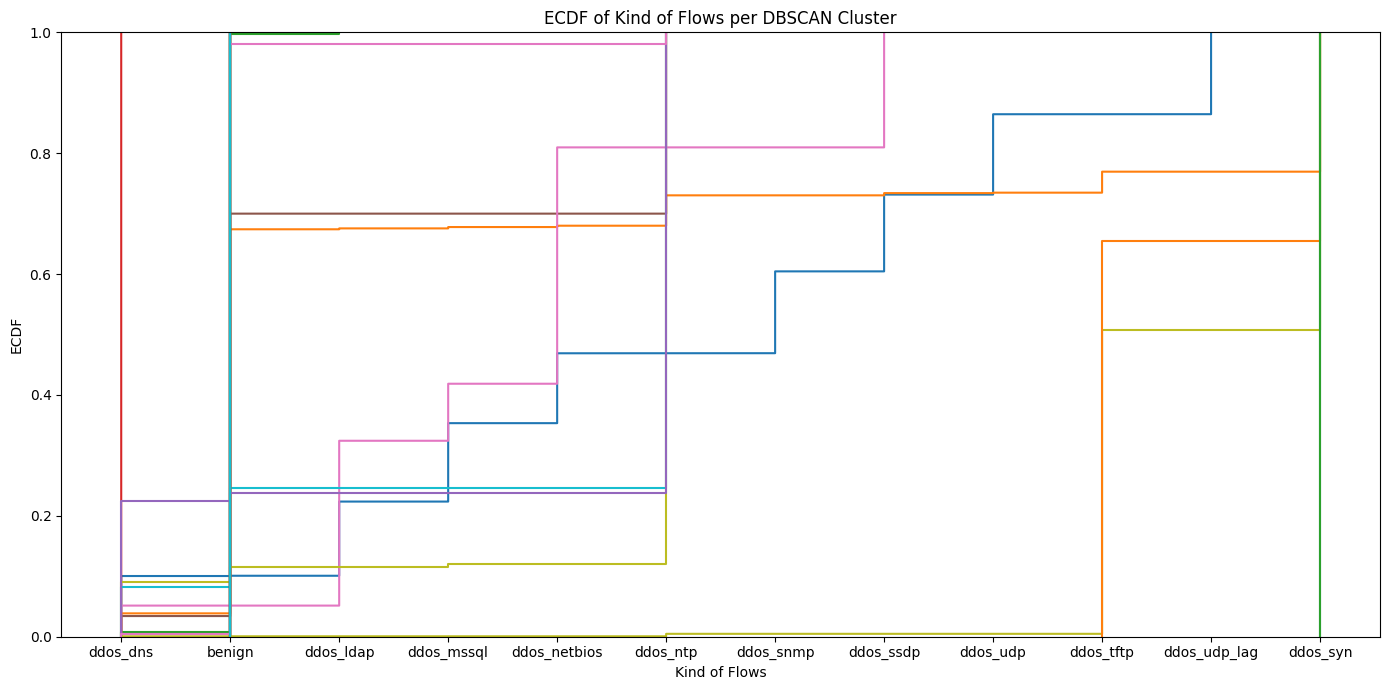

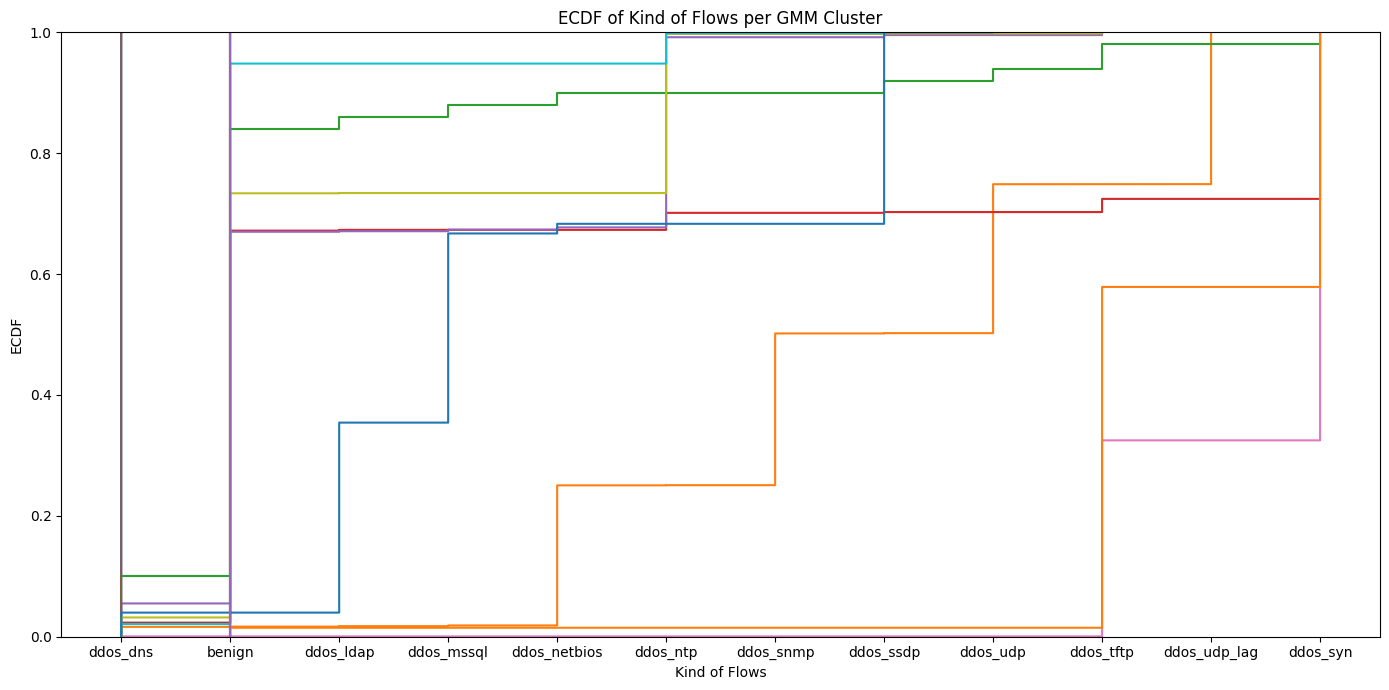

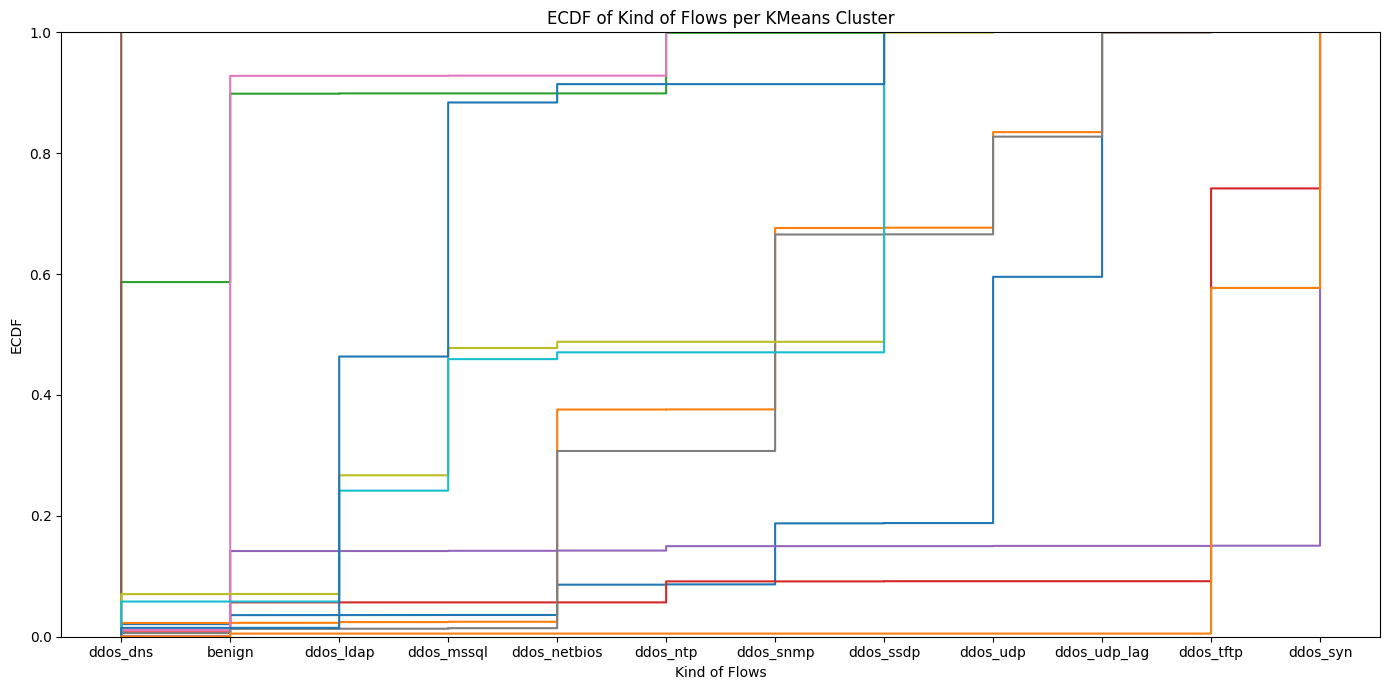

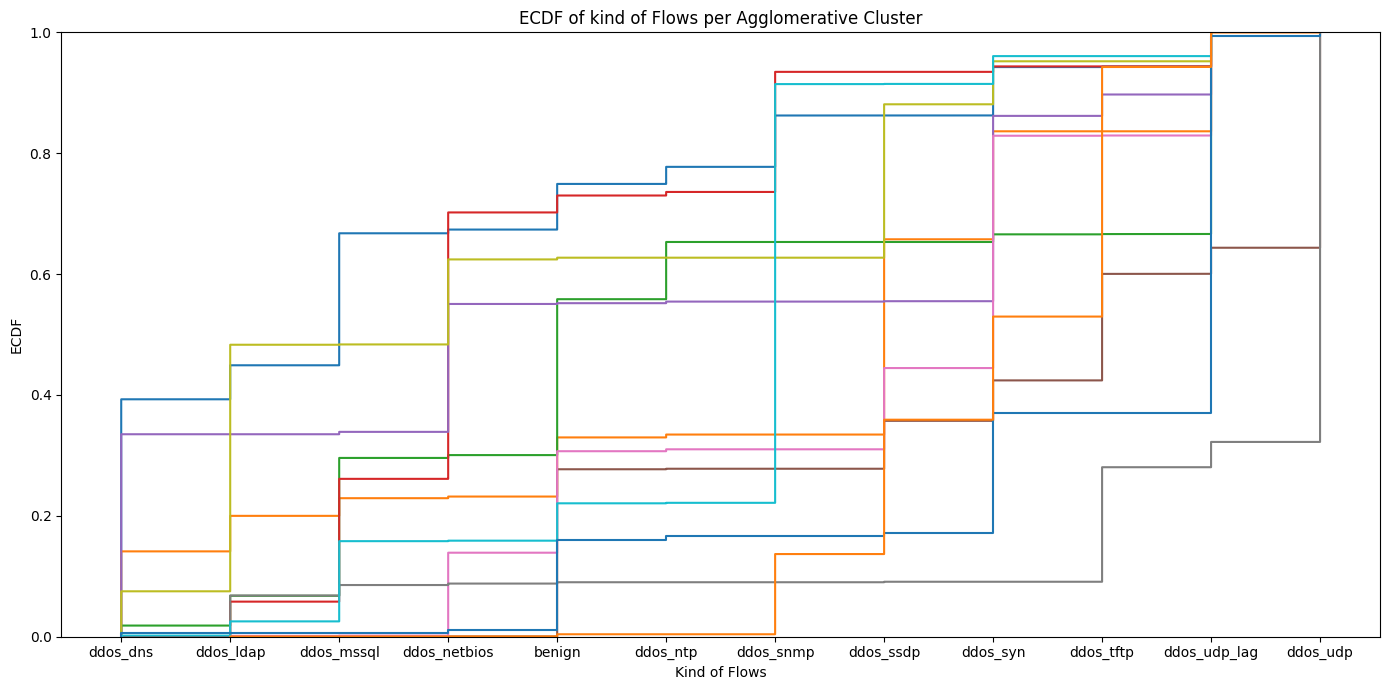

In [13]:
plt.figure(figsize=(14, 7))
# DBSCAN
for label in cluster_df['cid_dbscan'].unique():
    flows_per_cluster = cluster_df[cluster_df['cid_dbscan'] == label]['label']  
    sns.ecdfplot(flows_per_cluster, label=f'DBSCAN Cluster {label}')


plt.title('ECDF of Kind of Flows per DBSCAN Cluster')
plt.xlabel('Kind of Flows')
plt.ylabel('ECDF')
plt.tight_layout()
plt.show()

plt.figure(figsize=(14,7))
# GMM
for label in cluster_df['cid_gmm'].unique():
    flows_per_cluster = cluster_df[cluster_df['cid_gmm'] == label]['label']  
    sns.ecdfplot(flows_per_cluster, label=f'GMM Cluster {label}')


plt.title('ECDF of Kind of Flows per GMM Cluster')
plt.xlabel('Kind of Flows')
plt.ylabel('ECDF')
plt.tight_layout()
plt.show()

plt.figure(figsize=(14,7))
# KMeans
for label in cluster_df['cid_kmeans'].unique():
    flows_per_cluster = cluster_df[cluster_df['cid_kmeans'] == label]['label']  
    sns.ecdfplot(flows_per_cluster, label=f'KMeans Cluster {label}')


plt.title('ECDF of Kind of Flows per KMeans Cluster')
plt.xlabel('Kind of Flows')
plt.ylabel('ECDF')
plt.tight_layout()
plt.show()

plt.figure(figsize=(14,7))
# GMM
for label in cluster_df['cid_aggC'].unique():
    flows_per_cluster = cluster_df[cluster_df['cid_aggC'] == label]['label']  
    sns.ecdfplot(flows_per_cluster, label=f'Agglomerative Cluster {label}')


plt.title('ECDF of kind of Flows per Agglomerative Cluster')
plt.xlabel('Kind of Flows')
plt.ylabel('ECDF')
plt.tight_layout()
plt.show()

In [21]:
operational_df = pd.read_csv('pca_dataframe.csv', low_memory=False)
columns = df.columns.drop([0, 1, 2])
operational_df[columns] = df[columns]
operational_df

,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,...,c16,c17,c18,c19,c20,label,cid_gmm,cid_kmeans,cid_aggC,cid_dbscan
0,-0.478653,-0.589533,0.998409,3.153364,-0.529476,0.026641,0.041377,-0.166545,0.759498,1.414770,...,-0.167411,-0.002841,0.212975,-0.113852,0.663912,ddos_dns,C0,C8,C4,C0
1,-0.464128,-0.267606,0.902600,-0.274289,0.290000,-0.419849,-0.006116,-0.081098,0.218715,0.378501,...,-0.394006,0.011040,-0.200664,-0.347730,0.852744,ddos_dns,C2,C7,C10,C0
2,-0.523195,-0.620103,1.268103,6.121165,-0.677399,-0.215286,-0.012421,-0.116631,0.825826,2.255985,...,0.082282,-0.010010,0.272869,-0.026425,0.110287,ddos_dns,C0,C9,C4,C0
3,-0.459103,-0.568340,1.348160,6.088069,-0.513656,-0.407417,-0.019027,-0.262225,0.633310,2.353466,...,0.316027,-0.007291,-0.028930,0.117984,-0.720540,ddos_dns,C0,C9,C4,C0
4,-0.490045,-0.592144,1.310972,6.102321,-0.589558,-0.317669,-0.016804,-0.193621,0.722221,2.307315,...,0.207454,-0.008557,0.111031,0.050890,-0.335510,ddos_dns,C0,C9,C4,C0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64234,-0.753011,-0.575134,0.697743,-0.825301,-0.529642,1.072190,-0.732453,0.799935,0.247403,-0.251531,...,-0.572551,-0.001365,0.142755,-0.286975,1.045598,ddos_udp_lag,C2,C1,C7,C0
64235,0.190764,-0.564125,1.542294,0.108444,-0.168273,0.105530,-0.309632,-0.507971,-0.094418,0.931212,...,-0.098999,0.009681,-0.321107,0.081007,0.055753,ddos_udp_lag,C2,C8,C8,C0
64236,-0.722891,-0.590632,0.743384,-0.869410,-0.541982,1.102225,-0.763895,0.804658,0.225050,-0.251192,...,-0.573405,-0.001613,0.152310,-0.283288,1.105328,ddos_udp_lag,C2,C1,C7,C0
64237,0.191507,-0.546475,1.541808,0.038937,-0.121345,0.059439,-0.310107,-0.549008,-0.146202,0.940782,...,-0.032450,0.010323,-0.400198,0.121938,-0.143549,ddos_udp_lag,C2,C8,C0,C0


In [11]:
pca_result = pd.read_csv('pca_dataframe.csv', low_memory=False)

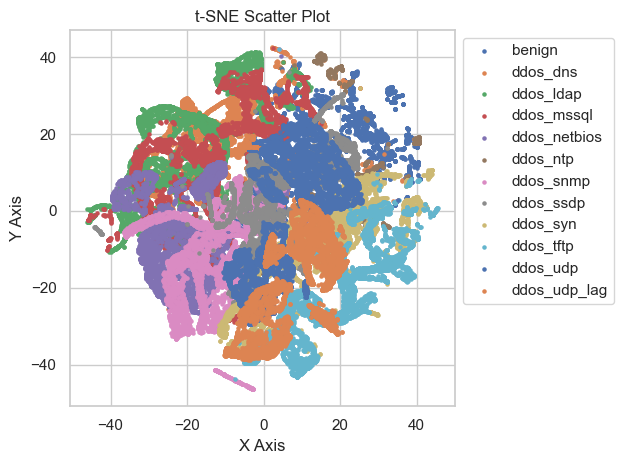

In [17]:
df = pd.read_csv('ddos_dataset.csv', low_memory=False)
columns = ['Flow ID', ' Source IP', ' Destination IP', 'SimillarHTTP']
for col in columns:
    df[col] = pd.Categorical(df[col]).codes

x_df = df[df.columns.drop([' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags', 'FIN Flag Count', ' PSH Flag Count', ' ECE Flag Count',
                             'Fwd Avg Bytes/Bulk', ' Fwd Avg Packets/Bulk', ' Fwd Avg Bulk Rate', ' Bwd Avg Bytes/Bulk', ' Bwd Avg Packets/Bulk',
                               'Bwd Avg Bulk Rate', 'label'])]
x_df.set_index(' Timestamp', inplace=True)

scaler = StandardScaler()
x_df = scaler.fit_transform(x_df)
tsne = TSNE(n_components=3, random_state=42)
X_tsne = tsne.fit_transform(x_df)
X_tsne = pd.DataFrame(X_tsne)

X_tsne['label'] = df['label']
X_tsne.to_csv('t_sne_dataframe', index=False)

fig, ax = plt.subplots()

for i in np.unique(X_tsne.label):
    subdf = X_tsne[X_tsne.label == i]
    ax.scatter(subdf[0], subdf[1], label=i, s=5)
lgnd = ax.legend(bbox_to_anchor=(1, 1), loc="upper left")
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_title('t-SNE Scatter Plot')
plt.tight_layout()
plt.show()

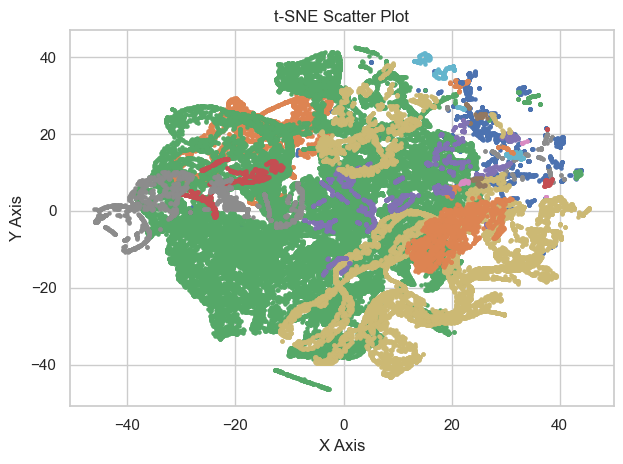

In [23]:
df_tsne = pd.read_csv('t_sne_dataframe', low_memory=False)
fig, ax = plt.subplots()
df_tsne['cid_dbscan'] = cluster_df['cid_dbscan']
for i in np.unique(df_tsne.cid_dbscan):
    subdf = df_tsne[df_tsne.cid_dbscan == i]
    ax.scatter(subdf['0'], subdf['1'], label=i, s=5)
#lgnd = ax.legend(bbox_to_anchor=(1, 1), loc="upper left")
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_title('t-SNE Scatter Plot')
plt.tight_layout()
plt.show()

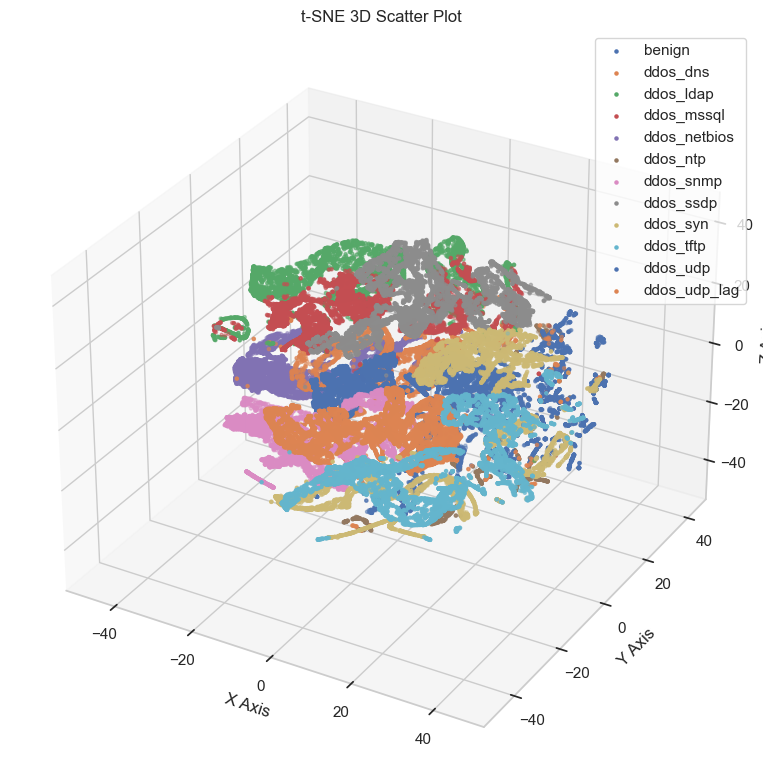

In [19]:
sns.set(style="whitegrid")
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for i in np.unique(df_tsne.label):
    subdf = df_tsne[df_tsne.label == i]
    ax.scatter(subdf['0'], subdf['1'], subdf['2'], label=i, s=5)

ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')
ax.set_title('t-SNE 3D Scatter Plot')
ax.legend()
plt.tight_layout()
plt.show()